# Import All Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV as grid
import sklearn.metrics  as met
import pickle
from sklearn.feature_selection import RFECV
from sklearn.metrics import recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

# Read Datasets

Saya hanya akan menggunakan 1 dataset saja yang berada pada *file* sampling_healthkathon2022.csv. Saya merasa bahwa *file* ini sudah cukup untuk melakukan prediksi.

In [40]:
sampling_healthckathon = pd.read_csv("sampling_healtkathon2022.csv")

In [3]:
# Print 5 records teratas dari dataset
sampling_healthckathon.head()

,id,id_peserta,dati2,typefaskes,usia,jenkel,pisat,tgldatang,tglpulang,jenispel,...,biaya,jenispulang,cbg,kelasrawat,kdsa,kdsp,kdsr,kdsi,kdsd,label
0,165666,486,17,KL,48,P,1.0,2018-07-25T17:00:00.000Z,2018-07-25T17:00:00.000Z,2,...,184300.0,1.0,Q-5-42-0,3,None,None,None,None,None,0
1,1010828,520,17,A,63,L,1.0,2019-05-27T17:00:00.000Z,2019-05-30T17:00:00.000Z,1,...,10628400.0,1.0,D-4-13-III,1,None,None,None,None,None,0
2,166042,523,17,KL,53,P,1.0,2019-07-16T17:00:00.000Z,2019-07-16T17:00:00.000Z,2,...,187300.0,1.0,Q-5-44-0,3,None,None,None,None,None,0
3,168937,549,17,KL,54,P,1.0,2019-10-17T17:00:00.000Z,2019-10-17T17:00:00.000Z,2,...,187300.0,1.0,Q-5-44-0,3,None,None,None,None,None,0
4,1005899,549,17,A,53,P,1.0,2018-04-18T17:00:00.000Z,2018-04-18T17:00:00.000Z,2,...,381600.0,1.0,Q-5-44-0,3,None,None,None,None,None,0


In [4]:
# Melihat informasi mengenai dataset seperti type data tiap features dan jumlah kolom maupun baris yang ada di dataset.
sampling_healthckathon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11401882 entries, 0 to 11401881
Data columns (total 22 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   id_peserta   int64  
 2   dati2        int64  
 3   typefaskes   object 
 4   usia         int64  
 5   jenkel       object 
 6   pisat        float64
 7   tgldatang    object 
 8   tglpulang    object 
 9   jenispel     int64  
 10  politujuan   object 
 11  diagfktp     object 
 12  biaya        float64
 13  jenispulang  float64
 14  cbg          object 
 15  kelasrawat   int64  
 16  kdsa         object 
 17  kdsp         object 
 18  kdsr         object 
 19  kdsi         object 
 20  kdsd         object 
 21  label        int64  
dtypes: float64(3), int64(7), object(12)
memory usage: 1.9+ GB


In [5]:
# Cek missing value pada setiap kolom
sampling_healthckathon.isnull().sum()

id                   0
id_peserta           0
dati2                0
typefaskes           0
usia                 0
jenkel              49
pisat              190
tgldatang            0
tglpulang            0
jenispel             0
politujuan     4041455
diagfktp          2530
biaya            57815
jenispulang         39
cbg                  0
kelasrawat           0
kdsa            198670
kdsp            197007
kdsr            198459
kdsi            198463
kdsd            195181
label                0
dtype: int64

In [6]:
#membuat variable yang hanya beisi id peserta dengan id kunjungan
id_kunjungan = sampling_healthckathon['id']
id_peserta = sampling_healthckathon['id_peserta']

In [7]:
id_kunjungan.head()

0     165666
1    1010828
2     166042
3     168937
4    1005899
Name: id, dtype: int64

In [8]:
# drop kolom id dan id_peserta
data = sampling_healthckathon.drop(['id', 'id_peserta'], axis=1)

In [9]:
data.head()

,dati2,typefaskes,usia,jenkel,pisat,tgldatang,tglpulang,jenispel,politujuan,diagfktp,biaya,jenispulang,cbg,kelasrawat,kdsa,kdsp,kdsr,kdsi,kdsd,label
0,17,KL,48,P,1.0,2018-07-25T17:00:00.000Z,2018-07-25T17:00:00.000Z,2,THT,L02.8,184300.0,1.0,Q-5-42-0,3,None,None,None,None,None,0
1,17,A,63,L,1.0,2019-05-27T17:00:00.000Z,2019-05-30T17:00:00.000Z,1,NaN,R23.1,10628400.0,1.0,D-4-13-III,1,None,None,None,None,None,0
2,17,KL,53,P,1.0,2019-07-16T17:00:00.000Z,2019-07-16T17:00:00.000Z,2,INT,E10.5,187300.0,1.0,Q-5-44-0,3,None,None,None,None,None,0
3,17,KL,54,P,1.0,2019-10-17T17:00:00.000Z,2019-10-17T17:00:00.000Z,2,MAT,H54.2,187300.0,1.0,Q-5-44-0,3,None,None,None,None,None,0
4,17,A,53,P,1.0,2018-04-18T17:00:00.000Z,2018-04-18T17:00:00.000Z,2,SAR,M54.5,381600.0,1.0,Q-5-44-0,3,None,None,None,None,None,0


# Cleansing Data

Menggunakan *imputer* untuk mengganti *missing value* sehingga tidak ada *missing value* dalam atribut atau kolom tersebut. Pada tahap ini saya menggunakan *strategy most_frequent* di mana melakukan *replace missing values* dengan nilai yang paling banyak muncul di kolom tersebut / modus yang ada di kolom tersebut.

In [10]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
clean_data = imp.fit(data).transform(data)

In [11]:
column_headers = list(data.columns.values)

In [12]:
clean_data

array([[17, 'KL', 48, ..., 'None', 'None', 0],
       [17, 'A', 63, ..., 'None', 'None', 0],
       [17, 'KL', 53, ..., 'None', 'None', 0],
       ...,
       [118, 'B', 0, ..., 'None', 'None', 0],
       [101, 'SC', 0, ..., 'None', 'None', 0],
       [12, 'SD', 0, ..., 'None', 'None', 0]], dtype=object)

In [13]:
clean_data = pd.DataFrame(clean_data, columns = column_headers)

In [14]:
clean_data.isnull().sum()

dati2          0
typefaskes     0
usia           0
jenkel         0
pisat          0
tgldatang      0
tglpulang      0
jenispel       0
politujuan     0
diagfktp       0
biaya          0
jenispulang    0
cbg            0
kelasrawat     0
kdsa           0
kdsp           0
kdsr           0
kdsi           0
kdsd           0
label          0
dtype: int64

# Exploratory Data Analysis

Pada tahap ini dilakukan *exploratory* data agar lebih mudah memahami dataset.

Tahap ini menggunakan 2 metode yaitu:
1. Univariate Analysis:
    
   di mana akan dilakukan analysis secara terpisah atau satu - satu dari setiap atributnya
   
    
2. Multivariate Analysis:

    Tahap ini akan dilakukan analysis secara langsung terhadap keseluruhan data yang dipilih

## Univariate Analysis

In [77]:
categorical_data = ['typefaskes', 'jenkel', 'politujuan', 'diagfktp', 'cbg', 'kdsa', 'kdsp', 'kdsr', 'kdsi', 'kdsd']

In [16]:
numerical_data = ['dati2', 'pisat', 'jenispel', 'biaya', 'jenispulang', 'kelasrawat', 'label']

In [17]:
date_data= ['tgldatang', 'tglpulang']

typefaskes unique values: 26
SC    3165558
C     2197424
B     2102708
SD     825690
SB     808444
A      493055
I3     285780
D      260327
I2     226470
KI     221114
KM     177017
KJ     173692
I4     164106
KL     101933
I1      49979
KC      28917
KB      25479
KP      17850
SA      17174
HD      14390
KO      12804
KG      11134
GD       9273
KT       7375
KU       4180
KK          9
Name: typefaskes, dtype: int64


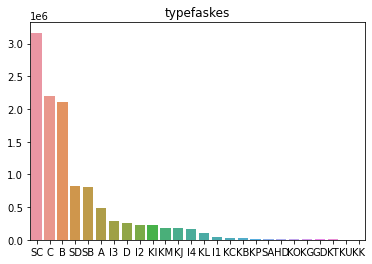

In [18]:
# jumlah data yang ada di kolom typefaskes
x = clean_data[categorical_data[0]].value_counts().index
y = clean_data[categorical_data[0]].value_counts().values

print("typefaskes unique values: {}".format(len(np.unique(clean_data[categorical_data[0]].value_counts()))))
print(clean_data[categorical_data[0]].value_counts())

plt.title(categorical_data[0])
sns.barplot(x=x, y=y, data = clean_data)
plt.show()

typefaskes unique values: 2
P    6161726
L    5240156
Name: jenkel, dtype: int64


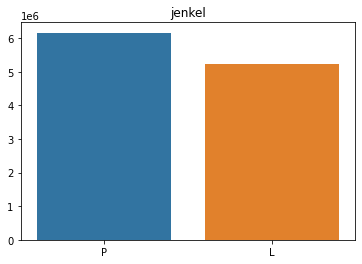

In [19]:
# jumlah data yang ada di kolom typefaskes
x = clean_data[categorical_data[1]].value_counts().index
y = clean_data[categorical_data[1]].value_counts().values

print("typefaskes unique values: {}".format(len(np.unique(clean_data[categorical_data[1]].value_counts()))))
print(clean_data[categorical_data[1]].value_counts())

plt.title(categorical_data[1])
sns.barplot(x=x, y=y, data = clean_data)
plt.show()

typefaskes unique values: 177
IGD    5610706
INT     830545
MAT     630344
SAR     605694
THT     485240
        ...   
URL          1
APT          1
URF          1
ODS          1
BPL          1
Name: politujuan, Length: 261, dtype: int64


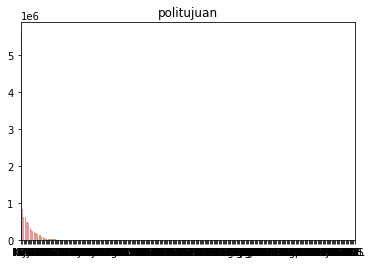

In [20]:
# jumlah data yang ada di kolom typefaskes
x = clean_data[categorical_data[2]].value_counts().index
y = clean_data[categorical_data[2]].value_counts().values

print("typefaskes unique values: {}".format(len(np.unique(clean_data[categorical_data[2]].value_counts()))))
print(clean_data[categorical_data[2]].value_counts())

plt.title(categorical_data[2])
sns.barplot(x=x, y=y, data = clean_data)
plt.show()

typefaskes unique values: 1955
Z09.8    410086
R50.9    346635
P03.4    207769
Z03.8    201981
K30      183918
          ...  
D165          1
Q436          1
m05.9         1
D83.1         1
E73.1         1
Name: diagfktp, Length: 17012, dtype: int64


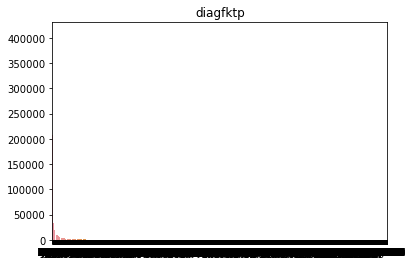

In [21]:
# jumlah data yang ada di kolom typefaskes
x = clean_data[categorical_data[3]].value_counts().index
y = clean_data[categorical_data[3]].value_counts().values

print("typefaskes unique values: {}".format(len(np.unique(clean_data[categorical_data[3]].value_counts()))))
print(clean_data[categorical_data[3]].value_counts())

plt.title(categorical_data[3])
sns.barplot(x=x, y=y, data = clean_data)
plt.show()

typefaskes unique values: 750
Q-5-44-0      2678848
Q-5-42-0      1012559
F-5-14-0       289409
P-8-17-I       248339
U-3-15-0       219126
               ...   
L-2-21-0            1
I-2-42-0            1
M-1-05-III          1
J-4-10-II           1
J-2-31-0            1
Name: cbg, Length: 1034, dtype: int64


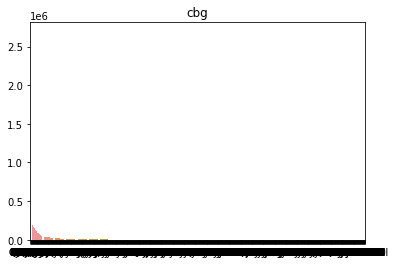

In [22]:
# jumlah data yang ada di kolom typefaskes
x = clean_data[categorical_data[4]].value_counts().index
y = clean_data[categorical_data[4]].value_counts().values

print("typefaskes unique values: {}".format(len(np.unique(clean_data[categorical_data[4]].value_counts()))))
print(clean_data[categorical_data[4]].value_counts())

plt.title(categorical_data[4])
sns.barplot(x=x, y=y, data = clean_data)
plt.show()

typefaskes unique values: 25
None           11388881
SF-4-10-II         4457
SF-4-10-III        3587
SF-4-10-I          1891
SF-4-10-X          1142
SF-4-10-IV          675
SF-4-13-II          355
SF-4-16-II          162
SF-4-16-III         147
SF-4-13-III         142
SF-4-13-I           125
SF-4-15-II           57
SF-4-16-I            52
SF-4-16-IV           45
SF-4-15-III          24
SF-4-13-IV           24
SF-4-15-I            20
SF-4-13-X            18
SF-4-11-II           12
SF-4-11-I            11
SF-4-15-IV           10
SF-4-16-X            10
SF-4-19-II            7
SF-4-11-III           6
SF-4-19-I             5
SA-4-14-I             3
SF-4-19-III           3
SA-4-14-X             3
SF-4-19-IV            1
SA-4-14-II            1
SF-4-12-II            1
ST-4-11-II            1
SF-4-11-IV            1
ST-1-10-III           1
SF-4-18-I             1
SF-4-15-X             1
Name: kdsa, dtype: int64


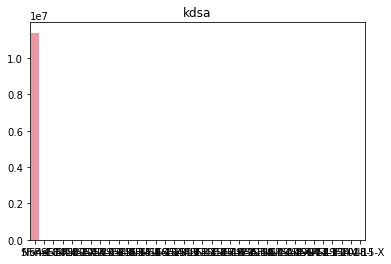

In [23]:
# jumlah data yang ada di kolom typefaskes
x = clean_data[categorical_data[5]].value_counts().index
y = clean_data[categorical_data[5]].value_counts().values

print("typefaskes unique values: {}".format(len(np.unique(clean_data[categorical_data[5]].value_counts()))))
print(clean_data[categorical_data[5]].value_counts())

plt.title(categorical_data[5])
sns.barplot(x=x, y=y, data = clean_data)
plt.show()

typefaskes unique values: 13
None         11329247
YY-10-III       51313
YY-02-III        7337
YY-01-II         5971
YY-09-III        4229
YY-05-III        2985
YY-11-III         346
YY-07-III         171
YY-03-III         130
YY-06-III          90
YY-08-III          32
YY-04-III          27
YY-12-III           4
Name: kdsp, dtype: int64


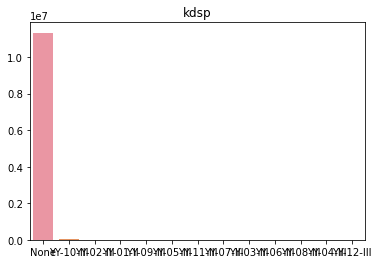

In [24]:
# jumlah data yang ada di kolom typefaskes
x = clean_data[categorical_data[6]].value_counts().index
y = clean_data[categorical_data[6]].value_counts().values

print("typefaskes unique values: {}".format(len(np.unique(clean_data[categorical_data[6]].value_counts()))))
print(clean_data[categorical_data[6]].value_counts())

plt.title(categorical_data[6])
sns.barplot(x=x, y=y, data = clean_data)
plt.show()

typefaskes unique values: 6
None         11395226
RR-04-III        5968
RR-02-II          651
RR-05-III          29
RR-01-II            5
RR-03-III           3
Name: kdsr, dtype: int64


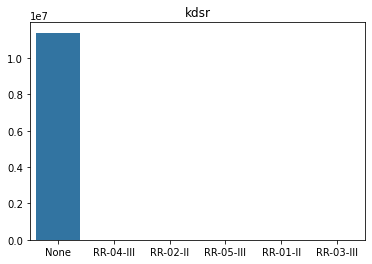

In [25]:
# jumlah data yang ada di kolom typefaskes
x = clean_data[categorical_data[7]].value_counts().index
y = clean_data[categorical_data[7]].value_counts().values

print("typefaskes unique values: {}".format(len(np.unique(clean_data[categorical_data[7]].value_counts()))))
print(clean_data[categorical_data[7]].value_counts())

plt.title(categorical_data[7])
sns.barplot(x=x, y=y, data = clean_data)
plt.show()

typefaskes unique values: 4
None         11392405
II-02-III        9412
II-01-III          46
II-03-III          19
Name: kdsi, dtype: int64


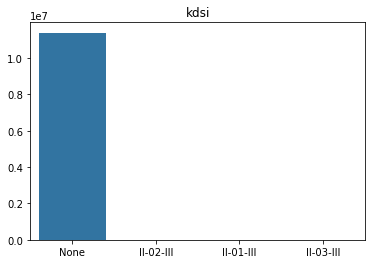

In [26]:
# jumlah data yang ada di kolom typefaskes
x = clean_data[categorical_data[8]].value_counts().index
y = clean_data[categorical_data[8]].value_counts().values

print("typefaskes unique values: {}".format(len(np.unique(clean_data[categorical_data[8]].value_counts()))))
print(clean_data[categorical_data[8]].value_counts())

plt.title(categorical_data[8])
sns.barplot(x=x, y=y, data = clean_data)
plt.show()

typefaskes unique values: 13
None         11329247
YY-10-III       51313
YY-02-III        7337
YY-01-II         5971
YY-09-III        4229
YY-05-III        2985
YY-11-III         346
YY-07-III         171
YY-03-III         130
YY-06-III          90
YY-08-III          32
YY-04-III          27
YY-12-III           4
Name: kdsp, dtype: int64


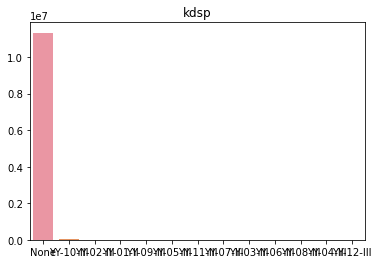

In [27]:
# jumlah data yang ada di kolom typefaskes
x = clean_data[categorical_data[6]].value_counts().index
y = clean_data[categorical_data[6]].value_counts().values

print("typefaskes unique values: {}".format(len(np.unique(clean_data[categorical_data[6]].value_counts()))))
print(clean_data[categorical_data[6]].value_counts())

plt.title(categorical_data[6])
sns.barplot(x=x, y=y, data = clean_data)
plt.show()

typefaskes unique values: 12
None        11249674
DD-10-II       60199
DD-07-II       38394
DD-09-II       21816
DD-06-II       10547
DD-02-II        8347
DD-04-II        8338
DD-08-II        2032
DD-01-I         1085
DD-03-II         906
DD-05-II         455
DD-11-II          89
Name: kdsd, dtype: int64


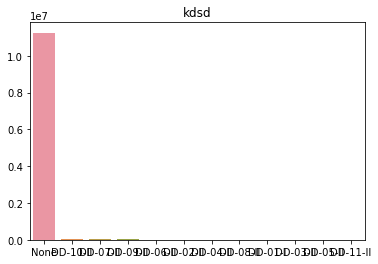

In [28]:
# jumlah data yang ada di kolom typefaskes
x = clean_data[categorical_data[9]].value_counts().index
y = clean_data[categorical_data[9]].value_counts().values

print("typefaskes unique values: {}".format(len(np.unique(clean_data[categorical_data[9]].value_counts()))))
print(clean_data[categorical_data[9]].value_counts())

plt.title(categorical_data[9])
sns.barplot(x=x, y=y, data = clean_data)
plt.show()

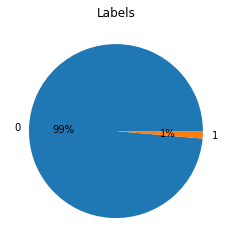

0    11244993
1      156889
Name: label, dtype: int64


In [29]:
labels = [clean_data[numerical_data[-1]].value_counts()[0],
          clean_data[numerical_data[-1]].value_counts()[1]]

keys = clean_data[numerical_data[-1]].value_counts().index

plt.title("Labels")
plt.pie(labels, labels=keys , autopct='%.0f%%')
plt.show()

print(clean_data[numerical_data[-1]].value_counts())

In [30]:
min(clean_data[numerical_data[0]].value_counts().index)

1

In [31]:
clean_data[numerical_data[5]].value_counts()

3    9715570
2     917742
1     768570
Name: kelasrawat, dtype: int64

In [32]:
clean_data[numerical_data[2]].value_counts()

2    7360414
1    4041468
Name: jenispel, dtype: int64

## Multivariate Analysis

In [33]:
for index in range (len(numerical_data)):
    clean_data[numerical_data[index]] = clean_data[numerical_data[index]].astype('int64')

In [34]:
# for index in range(len(date_data)):
#     clean_data[date_data[index]] = clean_data[date_data[index]].astype('datetime64')

In [35]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11401882 entries, 0 to 11401881
Data columns (total 20 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   dati2        int64 
 1   typefaskes   object
 2   usia         object
 3   jenkel       object
 4   pisat        int64 
 5   tgldatang    object
 6   tglpulang    object
 7   jenispel     int64 
 8   politujuan   object
 9   diagfktp     object
 10  biaya        int64 
 11  jenispulang  int64 
 12  cbg          object
 13  kelasrawat   int64 
 14  kdsa         object
 15  kdsp         object
 16  kdsr         object
 17  kdsi         object
 18  kdsd         object
 19  label        int64 
dtypes: int64(7), object(13)
memory usage: 1.7+ GB


In [36]:
hist_data = clean_data.drop(categorical_data, axis=1)
# hist_data = hist_data.drop(date_data, axis=1)

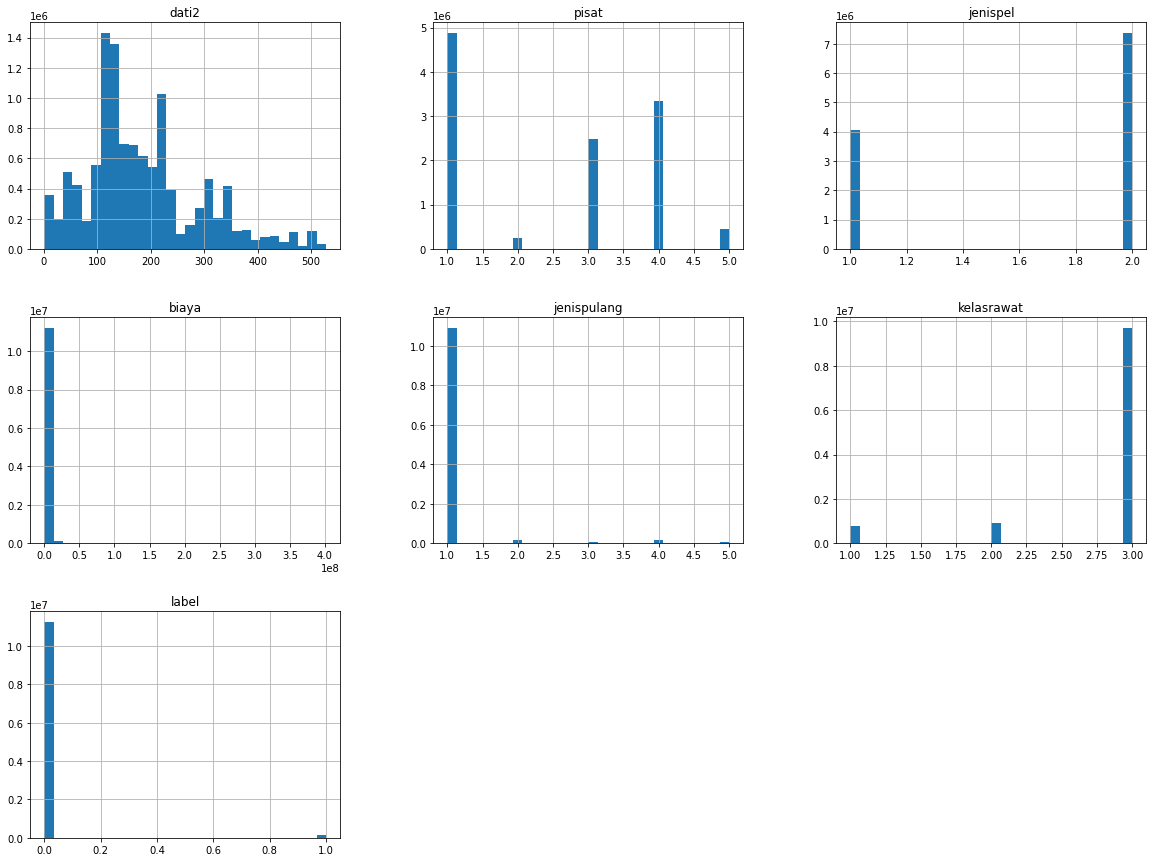

In [37]:
#All numerical features
hist_data.hist(bins=30, figsize=(20,15))
plt.show()

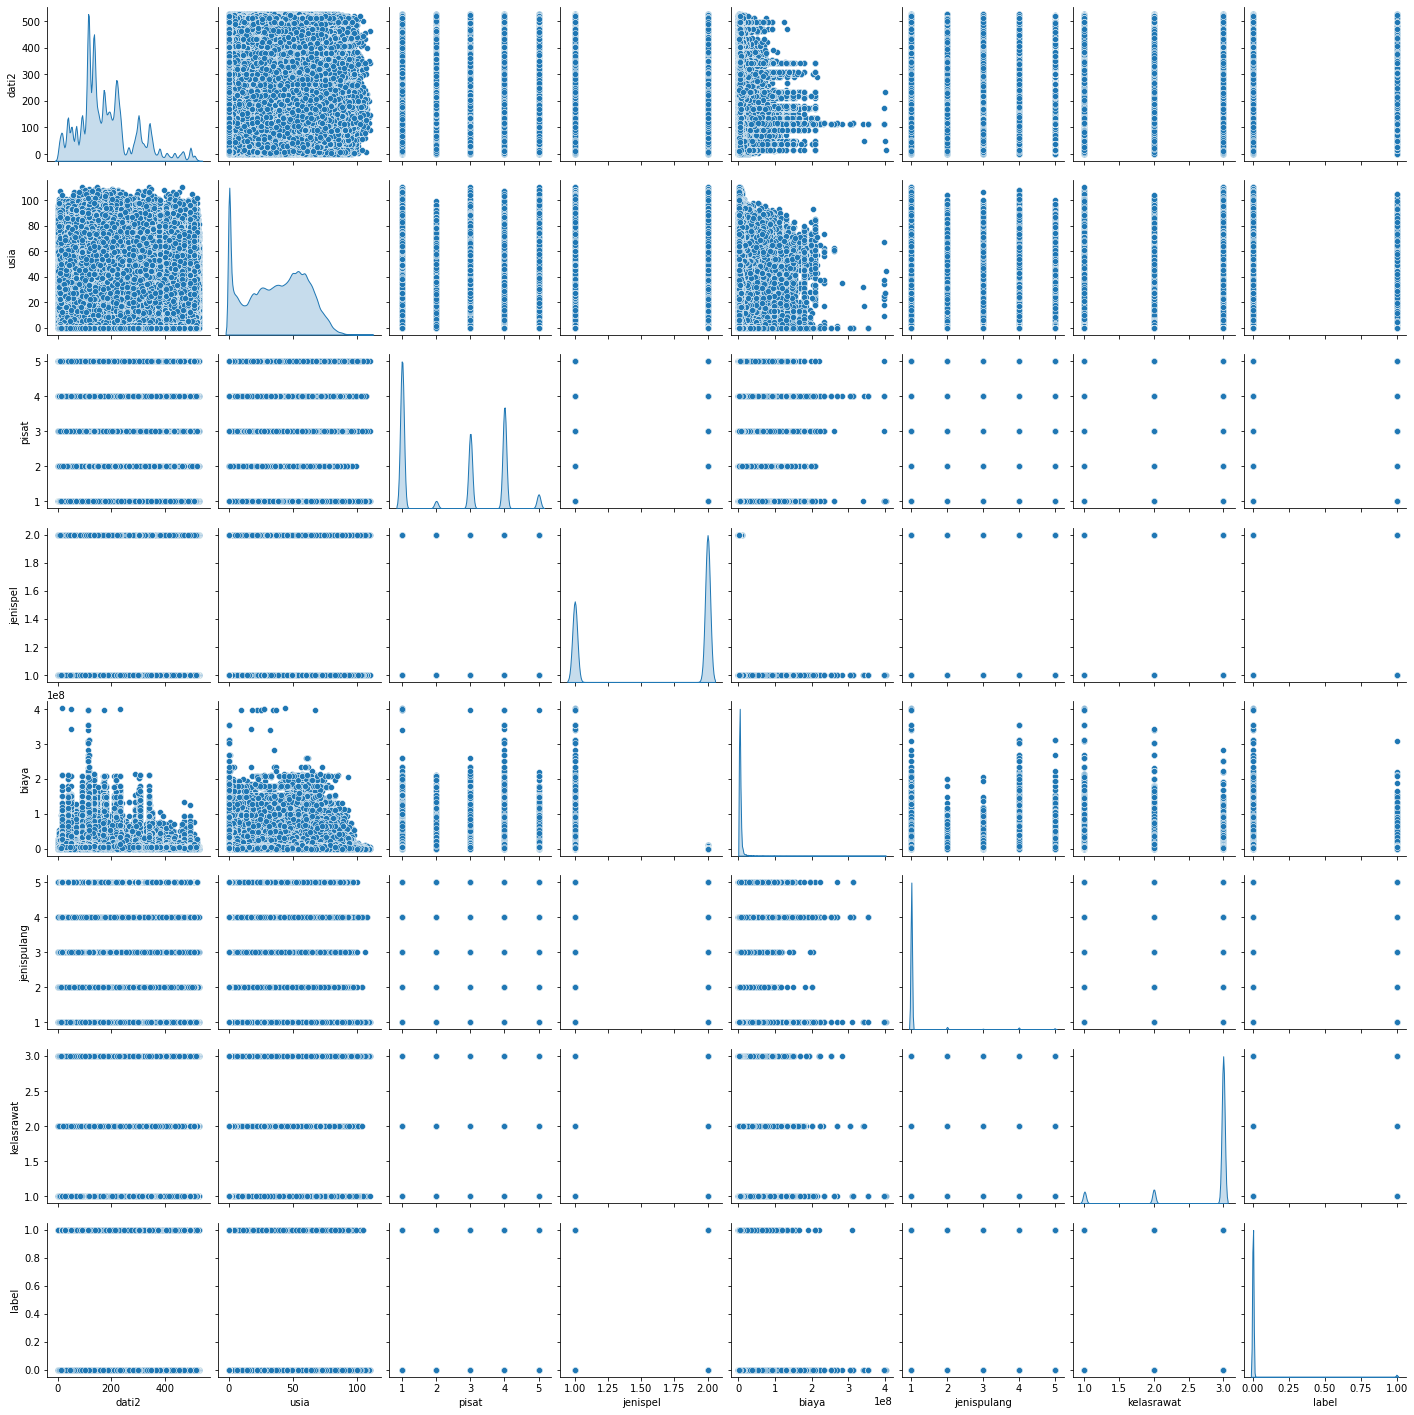

In [38]:
# Take a relationship between numeric features using pairplot() function
sns.pairplot(clean_data, diag_kind = 'kde')
plt.show()

Text(0.5, 1.0, 'Correlation Matrix for Numeric Feature ')

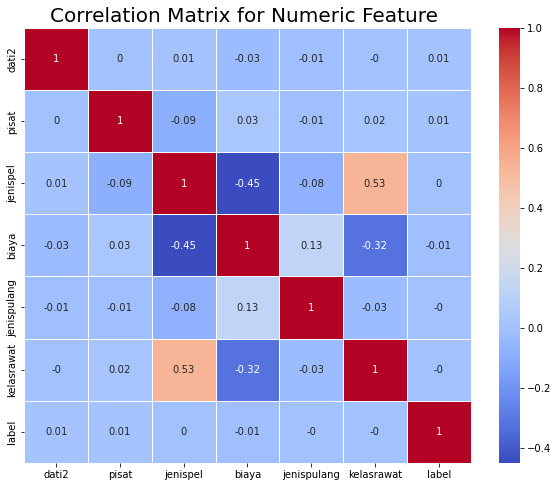

In [39]:
# Show correlation between each features using heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = clean_data.corr().round(2)

#To print score in the box, use anot=True parameter
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix for Numeric Feature ", size=20)

In [40]:
clean_data = clean_data.drop(['tgldatang', 'tglpulang'], axis=1)
clean_data.head()

,dati2,typefaskes,usia,jenkel,pisat,jenispel,politujuan,diagfktp,biaya,jenispulang,cbg,kelasrawat,kdsa,kdsp,kdsr,kdsi,kdsd,label
0,17,KL,48,P,1,2,THT,L02.8,184300,1,Q-5-42-0,3,None,None,None,None,None,0
1,17,A,63,L,1,1,IGD,R23.1,10628400,1,D-4-13-III,1,None,None,None,None,None,0
2,17,KL,53,P,1,2,INT,E10.5,187300,1,Q-5-44-0,3,None,None,None,None,None,0
3,17,KL,54,P,1,2,MAT,H54.2,187300,1,Q-5-44-0,3,None,None,None,None,None,0
4,17,A,53,P,1,2,SAR,M54.5,381600,1,Q-5-44-0,3,None,None,None,None,None,0


In [41]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11401882 entries, 0 to 11401881
Data columns (total 18 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   dati2        int64 
 1   typefaskes   object
 2   usia         object
 3   jenkel       object
 4   pisat        int64 
 5   jenispel     int64 
 6   politujuan   object
 7   diagfktp     object
 8   biaya        int64 
 9   jenispulang  int64 
 10  cbg          object
 11  kelasrawat   int64 
 12  kdsa         object
 13  kdsp         object
 14  kdsr         object
 15  kdsi         object
 16  kdsd         object
 17  label        int64 
dtypes: int64(7), object(11)
memory usage: 1.5+ GB


In [42]:
len(clean_data['diagfktp'].value_counts().index)

17012

In [43]:
len(clean_data[categorical_data[5]].value_counts().index)

36

## Data Preprocessing

*Data Preprocessing* dilakukan untuk memproses data agar siap di *training*. Adapun *preprocessing* yang dilakukan antara lain:

1. One hot encoding: mengubah data categorical menjadi numerical

2. Mendefinisikan variabel independen (x) dan variabel dependen (y)

3. Normalisasi dataset agar semua range dataset menjadi 0 - 1

4. Split train dan test data menggunakan 70% untuk data train dan 30% untuk data test

5. *Handling imbalanced data* dengan menggunakan *Oversampling*

### One Hot Encoding

Pada tahap ini, digunakan pembagian one hot dan tidak dilakukan secara langsung dikarenakan jika memproses semua dataset secara langsung, maka RAM tidak akan cukup dan terjadi *Memory Error*.

#### One Hot typefaskes

In [40]:
typefaskes_onehot = {}
i = 0

for index in range (len(clean_data['typefaskes'].value_counts().index)):
    typefaskes_onehot.update({clean_data['typefaskes'].value_counts().index[index] : i})
    i+=1

In [41]:
encode_typefaskes = {'typefaskes':typefaskes_onehot}
clean_data.replace(encode_typefaskes, inplace=True)

#### One Hot jenkel

In [42]:
jenkel_onehot = {}
i = 0

for index in range (len(clean_data['jenkel'].value_counts().index)):
    jenkel_onehot.update({clean_data['jenkel'].value_counts().index[index] : i})
    i+=1

In [43]:
encode_jenkel = {'jenkel': jenkel_onehot}
clean_data.replace(encode_jenkel, inplace= True)

#### One Hot politujuan

In [44]:
politujuan_onehot = {}
i = 0

for index in range (len(clean_data['politujuan'].value_counts().index)):
    politujuan_onehot.update({clean_data['politujuan'].value_counts().index[index] : i})
    i+=1

In [45]:
encode_politujuan = {'politujuan': politujuan_onehot}
clean_data.replace(encode_politujuan, inplace=True)

#### One Hot cbg

In [46]:
cbg_onehot = {}
i = 0

for index in range (len(clean_data['cbg'].value_counts().index)):
    cbg_onehot.update({clean_data['cbg'].value_counts().index[index] : i})
    i+=1

In [47]:
encode_cbg = {'cbg': cbg_onehot}
clean_data.replace(encode_cbg, inplace= True)

#### One Hot for K_data

In [34]:
k_data = categorical_data[5:10]
k_data

['kdsa', 'kdsp', 'kdsr', 'kdsi', 'kdsd']

In [51]:
k_data_onehot= {}

i = 0

for column in k_data:
    for index in range (len(clean_data[column].value_counts().index)):
        k_data_onehot.update({clean_data[column].value_counts().index[index] : i})
        i+=1
    encode = {column: k_data_onehot}
    clean_data.replace(encode, inplace=True)

In [52]:
# All ENCODE
# onehot = {}
# i = 0

# for j in categorical_data:    
#     for index in range (len(clean_data[j].value_counts().index)):
#         onehot.update({clean_data[j].value_counts().index[index] : i})
#         i+=1
#     encode = {j : onehot}
#     clean_data.replace(encode, inplace = True)
# #     for index in range (len())

In [53]:
clean_data.head()

,dati2,typefaskes,usia,jenkel,pisat,jenispel,politujuan,diagfktp,biaya,jenispulang,cbg,kelasrawat,kdsa,kdsp,kdsr,kdsi,kdsd,label
0,17,13,48,0,1,2,4,L02.8,184300,1,1,3,0,36,49,55,59,0
1,17,5,63,1,1,1,0,R23.1,10628400,1,97,1,0,36,49,55,59,0
2,17,13,53,0,1,2,1,E10.5,187300,1,0,3,0,36,49,55,59,0
3,17,13,54,0,1,2,2,H54.2,187300,1,0,3,0,36,49,55,59,0
4,17,5,53,0,1,2,3,M54.5,381600,1,0,3,0,36,49,55,59,0


In [54]:
clean_data.to_csv('categorical_to_numerical(2).csv')

#### One Hot diagfktp

*One hot* untuk kolom diagfktp dibagi menjadi beberap kali, dikarenakan akan terjadi *Memory Error* jika melakukan *one hot encoding* di kolom ini

In [ ]:
onehot_file = pd.read_csv('diagfktp_onehot(2).csv')

onehot_file = onehot_file.drop(['Unnamed: 0'], axis=1)
onehot_file.head()

In [ ]:
new_dict = {}
for index in range (onehot_file.shape[0]):
    new_dict.update({onehot_file['diagfktp'][index] : onehot_file['onehot'][index]})

In [ ]:
#diagfktp1 dari 0 - 1000000 data
diagfktp_1 = diagfktp[0:1000000]
diagfktp_1 = pd.DataFrame(diagfktp_1)
encode_diagfktp = {'diagfktp':new_dict}
diagfktp_1.replace(encode_diagfktp, inplace=True)

In [ ]:
# diagfktp2 dari 1000000 - 3000000 data
diagfktp_2 = diagfktp[1000000:3000000]
diagfktp_2 = pd.DataFrame(diagfktp_2)
encode_diagfktp = {'diagfktp':new_dict}
diagfktp_2.replace(encode_diagfktp, inplace=True)

In [ ]:
#diagfktp3 dari 3000000 - 5000000 data
diagfktp_3 = diagfktp[3000000:5000000]
diagfktp_3 = pd.DataFrame(diagfktp_3)
encode_diagfktp = {'diagfktp':new_dict}
diagfktp_3.replace(encode_diagfktp, inplace=True)

In [ ]:
#diagfktp4 dari 5000000 - 7000000 data
diagfktp_4 = diagfktp[5000000:7000000]
diagfktp_4 = pd.DataFrame(diagfktp_4)
encode_diagfktp = {'diagfktp':new_dict}
diagfktp_4.replace(encode_diagfktp, inplace=True)

In [ ]:
#diagfktp5 dari 7000000 - 9000000 data
diagfktp_5 = diagfktp[7000000:9000000]
diagfktp_5 = pd.DataFrame(diagfktp_5)
encode_diagfktp = {'diagfktp':new_dict}
diagfktp_5.replace(encode_diagfktp, inplace=True)

In [ ]:
#diagfktp5 dari 9000000 - 11401882 data
diagfktp_6 = diagfktp[9000000:]
diagfktp_6 = pd.DataFrame(diagfktp_6)
encode_diagfktp = {'diagfktp':new_dict}
diagfktp_6.replace(encode_diagfktp, inplace=True)

In [ ]:
all_diagfktp = pd.concat([diagfktp_1, diagfktp_2, diagfktp_3, diagfktp_4, diagfktp_5, diagfktp_6])

In [ ]:
all_diagfktp.to_csv("all_diagfktp.csv",index=False)

In [ ]:
onehot_file = onehot_file.drop(['diagfktp'], axis=1)
onehot_file()

In [ ]:
onehot_file = onehot_file.join(all_diagfktp)
onehot_file.head()

In [ ]:
# Save semua hasil one hot encoding
data.to_csv('onehot_data.csv', index=False)

#### Read onehot_data.csv 

In [2]:
data = pd.read_csv('onehot_data.csv')

In [23]:
data.head()

,dati2,typefaskes,usia,jenkel,pisat,jenispel,politujuan,biaya,jenispulang,cbg,kelasrawat,kdsa,kdsp,kdsr,kdsi,kdsd,label,diagfktp
0,17,13,48,0,1,2,4,184300,1,1,3,0,36,49,55,59,0,614
1,17,5,63,1,1,1,0,10628400,1,97,1,0,36,49,55,59,0,7661
2,17,13,53,0,1,2,1,187300,1,0,3,0,36,49,55,59,0,655
3,17,13,54,0,1,2,2,187300,1,0,3,0,36,49,55,59,0,75
4,17,5,53,0,1,2,3,381600,1,0,3,0,36,49,55,59,0,5


In [24]:
data.isnull().sum()

dati2          0
typefaskes     0
usia           0
jenkel         0
pisat          0
jenispel       0
politujuan     0
biaya          0
jenispulang    0
cbg            0
kelasrawat     0
kdsa           0
kdsp           0
kdsr           0
kdsi           0
kdsd           0
label          0
diagfktp       0
dtype: int64

### Define x and y

Mendefinisikan variabel x dan y di mana pada variabel x melakukan *drop* pada kolom label sehingga variabel x hanya berisi data independen saja dan variabel y berisi kolom label

In [25]:
x = data.drop(['label'], axis=1)
y = data['label']

### Normalize x values

Normalisasi data dengan menggunakan *StandardScaler* agar skala dataset memiliki kesamaan dari 0 - 1

In [26]:
scaler = StandardScaler().fit(x)
x = scaler.transform(x)

In [27]:
x.shape

(11401882, 17)

### Get only 5.000.000 data

Membuat variabel baru yaitu x_data dan y_data di mana hanya menyimpan 5.000.000 data, dikarenakan RAM hanya mampu memproses data sebanyak itu

In [28]:
x_data = x[0:5000000]
y_data = y[0:5000000]

In [29]:
x_data.shape

(5000000, 17)

In [30]:
y_data.shape

(5000000,)

In [31]:
y_data.value_counts()

0    4931585
1      68415
Name: label, dtype: int64

### Split train and test data with test_size = 30% and train_size  = 70%

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data,test_size=0.3)

In [33]:
y_train.value_counts()

0    3452005
1      47995
Name: label, dtype: int64

In [34]:
x_train.shape

(3500000, 17)

### Oversampling to handle imbalanced data

In [10]:
smote = SMOTE()

In [36]:
x_train_smote,  y_train_smote = smote.fit_resample(x_train, y_train)

In [37]:
print("After oversampling: ",Counter(y_train_smote))

After oversampling:  Counter({0: 3452005, 1: 3452005})


In [38]:
x_train.shape

(3500000, 17)

In [39]:
y_train_smote.value_counts()

0    3452005
1    3452005
Name: label, dtype: int64

## Modeling

### Random Forest Classifier

In [ ]:
model_smote = RandomForestClassifier(n_estimators = 500, criterion= 'entropy')
model_smote.fit(x_train_smote, y_train_smote)

In [144]:
x.shape

(11401882, 17)

In [26]:
predict_smote = model_smote.predict(x)

In [ ]:
print("Accuracy SMOTE: {}".format(accuracy_score(y, predict_smote)))

In [37]:
print("Confussion Matrix SMOTE: \n{}".format(met.confusion_matrix(y, predict_smote)))
print("Classification Report SMOTE: \n{}".format(classification_report(y, predict_smote)))

Confussion Matrix SMOTE: 
[[11210769    34224]
 [   61354    95535]]
Classification Report SMOTE: 
              precision    recall  f1-score   support

           0       0.99      1.00      1.00  11244993
           1       0.74      0.61      0.67    156889

    accuracy                           0.99  11401882
   macro avg       0.87      0.80      0.83  11401882
weighted avg       0.99      0.99      0.99  11401882



In [38]:
recall_score(y, predict_smote)

0.6089337047211723

In [39]:
# save the model to disk
filename = 'forest_smote_model.sav'
pickle.dump(model_smote, open(filename, 'wb'))

In [42]:
# load model
model = pickle.load(open('forest_smote_model.sav', 'rb'))

In [31]:
# memasukkan hasil prediksi ke key label untuk dimasukkan ke dataframe
forest_smote = {'label': predict_smote}

In [32]:
#mengubah dictionary forest_smote menjadi dataframe sebelum diinput ke csv
forest_smote = pd.DataFrame(forest_smote)
forest_smote.head()

,label
0,0
1,0
2,0
3,0
4,0


In [33]:
# mengubah variabel id_kunjungan menjadi dataframe yang akan diinput ke csv dengan kolom label hasil prediksi
id_kunjungan = pd.DataFrame(id_kunjungan)

In [34]:
id_kunjungan.head()

,id
0,165666
1,1010828
2,166042
3,168937
4,1005899


In [35]:
# menggabungkan kolom id_kunjungan dengan hasil prediksi
forest_smote_prediction = id_kunjungan.join(forest_smote)

In [36]:
# menyimpan hasil penggabungan id_kunjungan dengan hasil prediksi kedalam file csv dengan mengabaikan index
forest_smote_prediction.to_csv('forest_smote_prediction.csv', index = False)

In [85]:
data_independent = data.drop(['label'], axis=1)